# Retinal Image Analysis
### By Mathew Kuruvilla

In [1]:
import tensorflow as tf
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import array_to_img
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import pandas as pd
import random
import sys
import io
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
training_data = pd.read_csv('C:/Users/mathe/Documents/Retinal_Data/Training_Set/Training_Set/RFMiD_Training_Labels.csv')
validation_data = pd.read_csv('C:/Users/mathe/Documents/Retinal_Data/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv')
testing_data = pd.read_csv('C:/Users/mathe/Documents/Retinal_Data/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')

#training_data = pd.read_csv('C:/Users/mathe/OneDrive/Documents/OneDrive - Temple University/bpip/Retinal_Data/Training_Set/Training_Set/RFMiD_Training_Labels.csv')
#validation_data = pd.read_csv('C:/Users/mathe/OneDrive/Documents/OneDrive - Temple University/bpip/Retinal_Data/Evaluation_Set/Evaluation_Set/RFMiD_Validation_Labels.csv')
#testing_data = pd.read_csv('C:/Users/mathe/OneDrive/Documents/OneDrive - Temple University/bpip/Retinal_Data/Test_Set/Test_Set/RFMiD_Testing_Labels.csv')

In [3]:
training_data['path'] = [f'C:/Users/mathe/Documents/Retinal_Data/Training_Set/Training_Set/Training/{id}.png' for id in training_data['ID']]
validation_data['path'] = [f'C:/Users/mathe/Documents/Retinal_Data/Evaluation_Set/Evaluation_Set/Validation/{id}.png' for id in validation_data['ID']]
testing_data['path'] = [f'C:/Users/mathe/Documents/Retinal_Data/Test_Set/Test_Set/Test/{id}.png' for id in testing_data['ID']]

#training_data['path'] = [f'C:/Users/mathe/OneDrive/Documents/OneDrive - Temple University/bpip/Retinal_Data/Training_Set/Training_Set/Training/{id}.png' for id in training_data['ID']]
#validation_data['path'] = [f'C:/Users/mathe/OneDrive/Documents/OneDrive - Temple University/bpip/Retinal_Data/Evaluation_Set/Evaluation_Set/Validation/{id}.png' for id in validation_data['ID']]
#testing_data['path'] = [f'C:/Users/mathe/OneDrive/Documents/OneDrive - Temple University/bpip/Retinal_Data/Test_Set/Test_Set/Test/{id}.png' for id in testing_data['ID']]

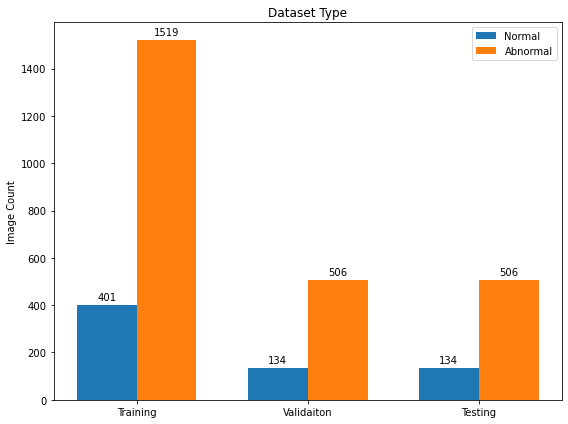

In [4]:
labels = ['Training','Validaiton','Testing']
normal_counts = [training_data['Disease_Risk'].value_counts()[0],validation_data['Disease_Risk'].value_counts()[0],testing_data['Disease_Risk'].value_counts()[0]]
abnormal_counts = [training_data['Disease_Risk'].value_counts()[1],validation_data['Disease_Risk'].value_counts()[1],testing_data['Disease_Risk'].value_counts()[1]]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, normal_counts, width, label='Normal')
rects2 = ax.bar(x + width/2, abnormal_counts, width, label='Abnormal')

ax.set_ylabel('Image Count')
ax.set_title('Dataset Type')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.set_figwidth(8)
fig.set_figheight(6)
fig.tight_layout()

plt.show()

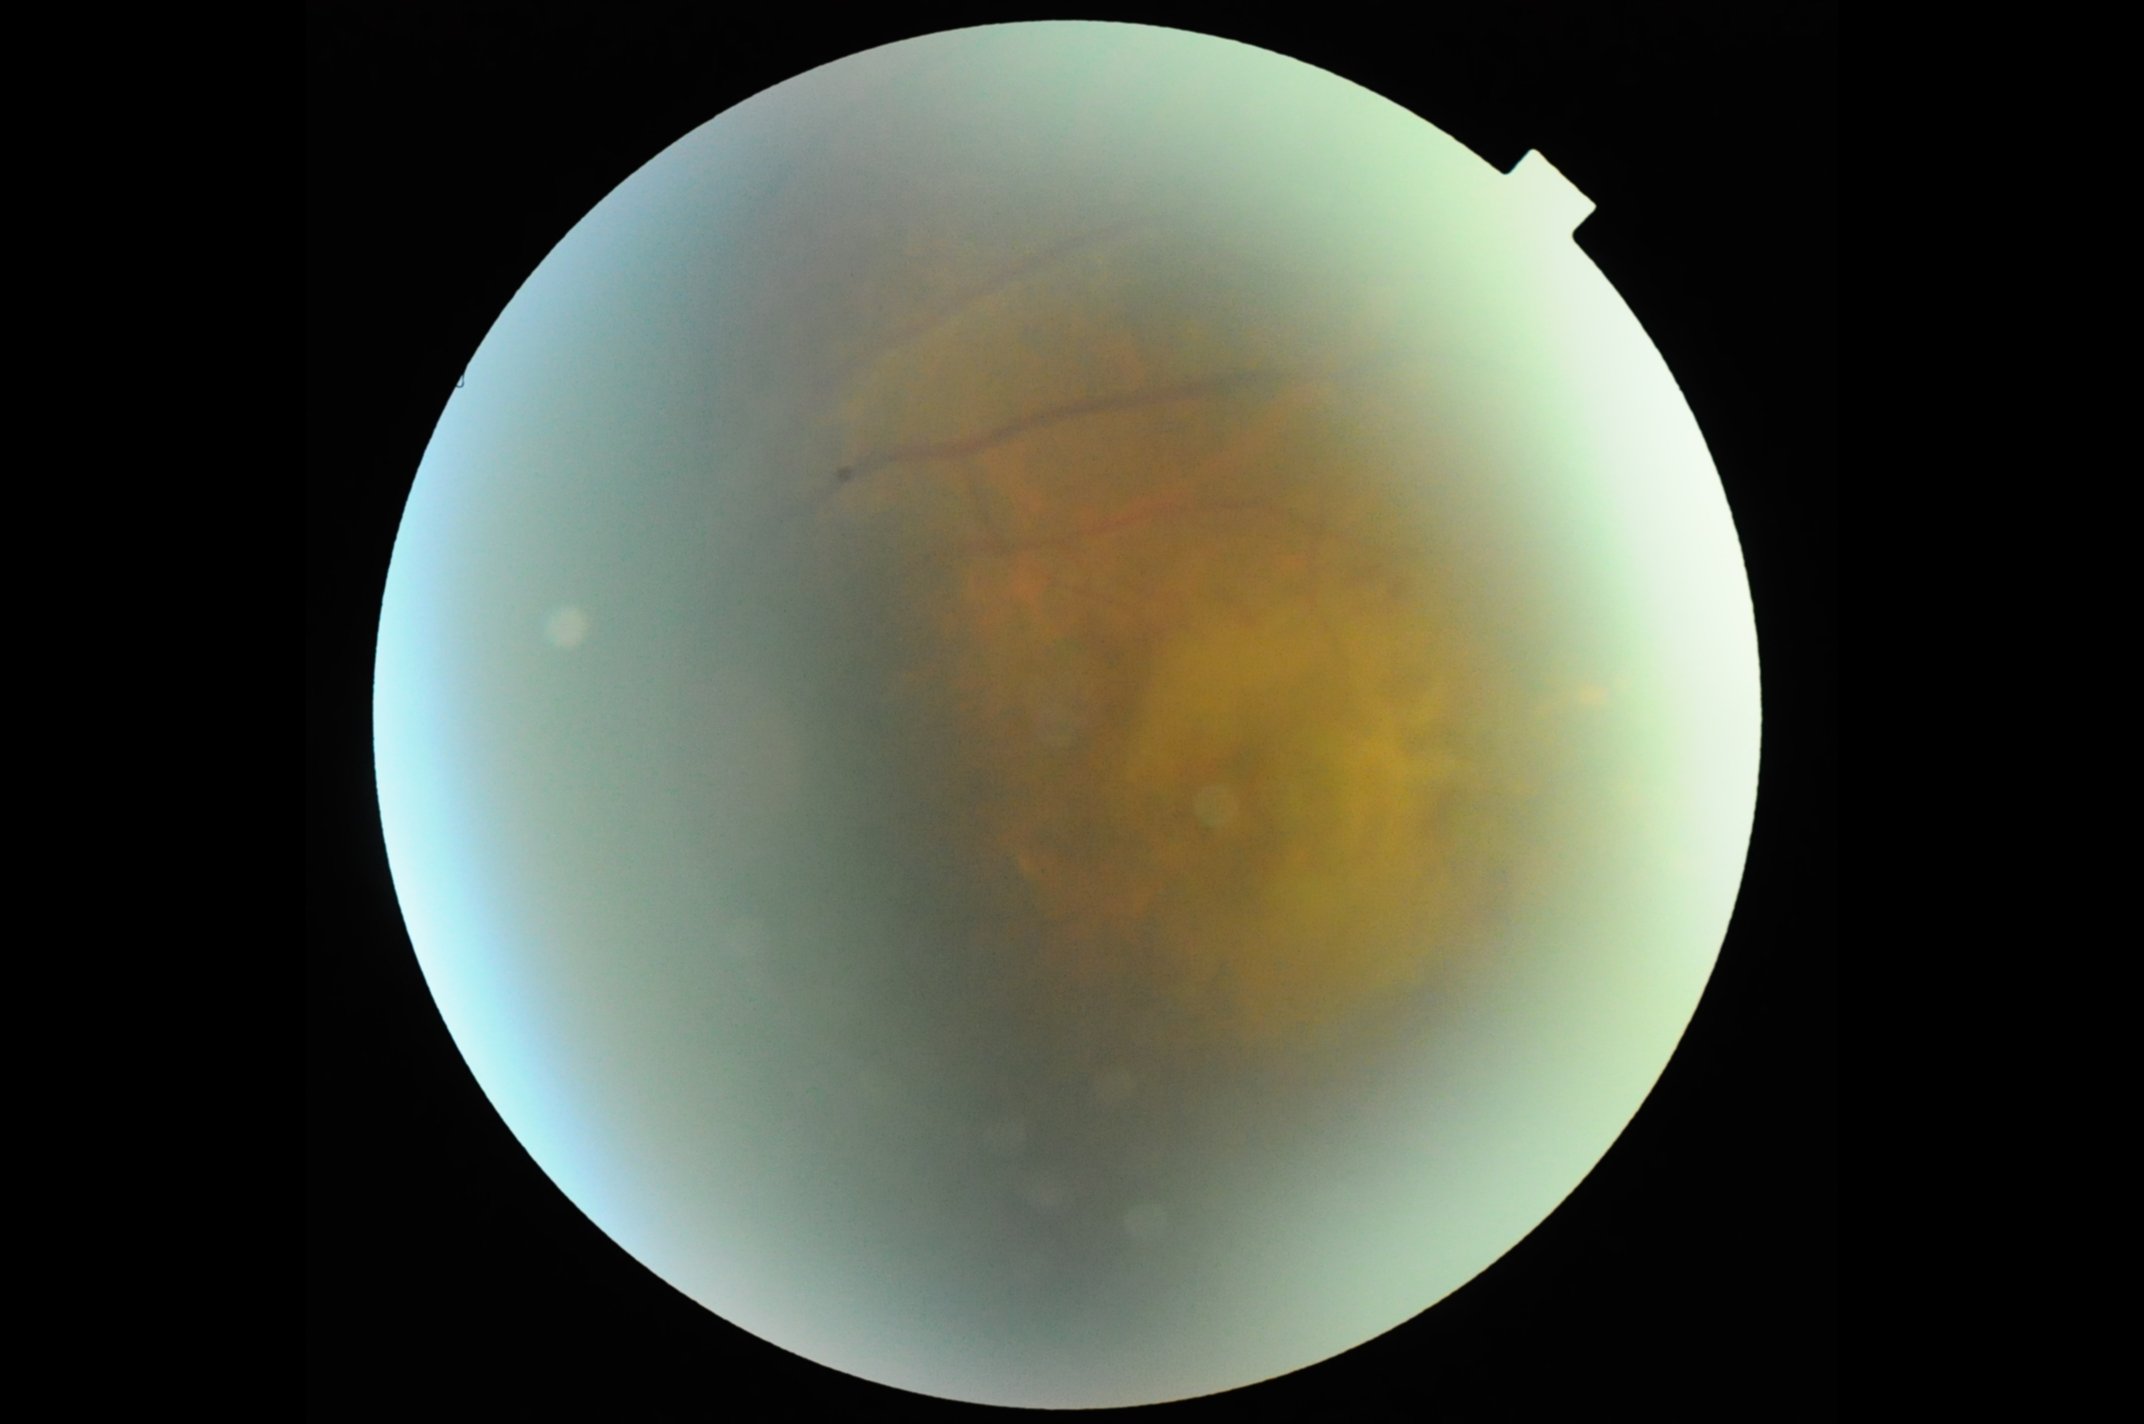

(1424, 2144, 3)

In [5]:
img = load_img(training_data['path'][10])
imgarr = img_to_array(img)
x=tf.keras.layers.Resizing(200, 200)
x=x(imgarr)
y=array_to_img(x)
imgarrz = img_to_array(y)
display(img)
imgarr.shape

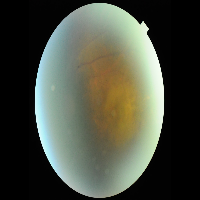

(200, 200, 3)

In [6]:
display(y)
imgarrz.shape

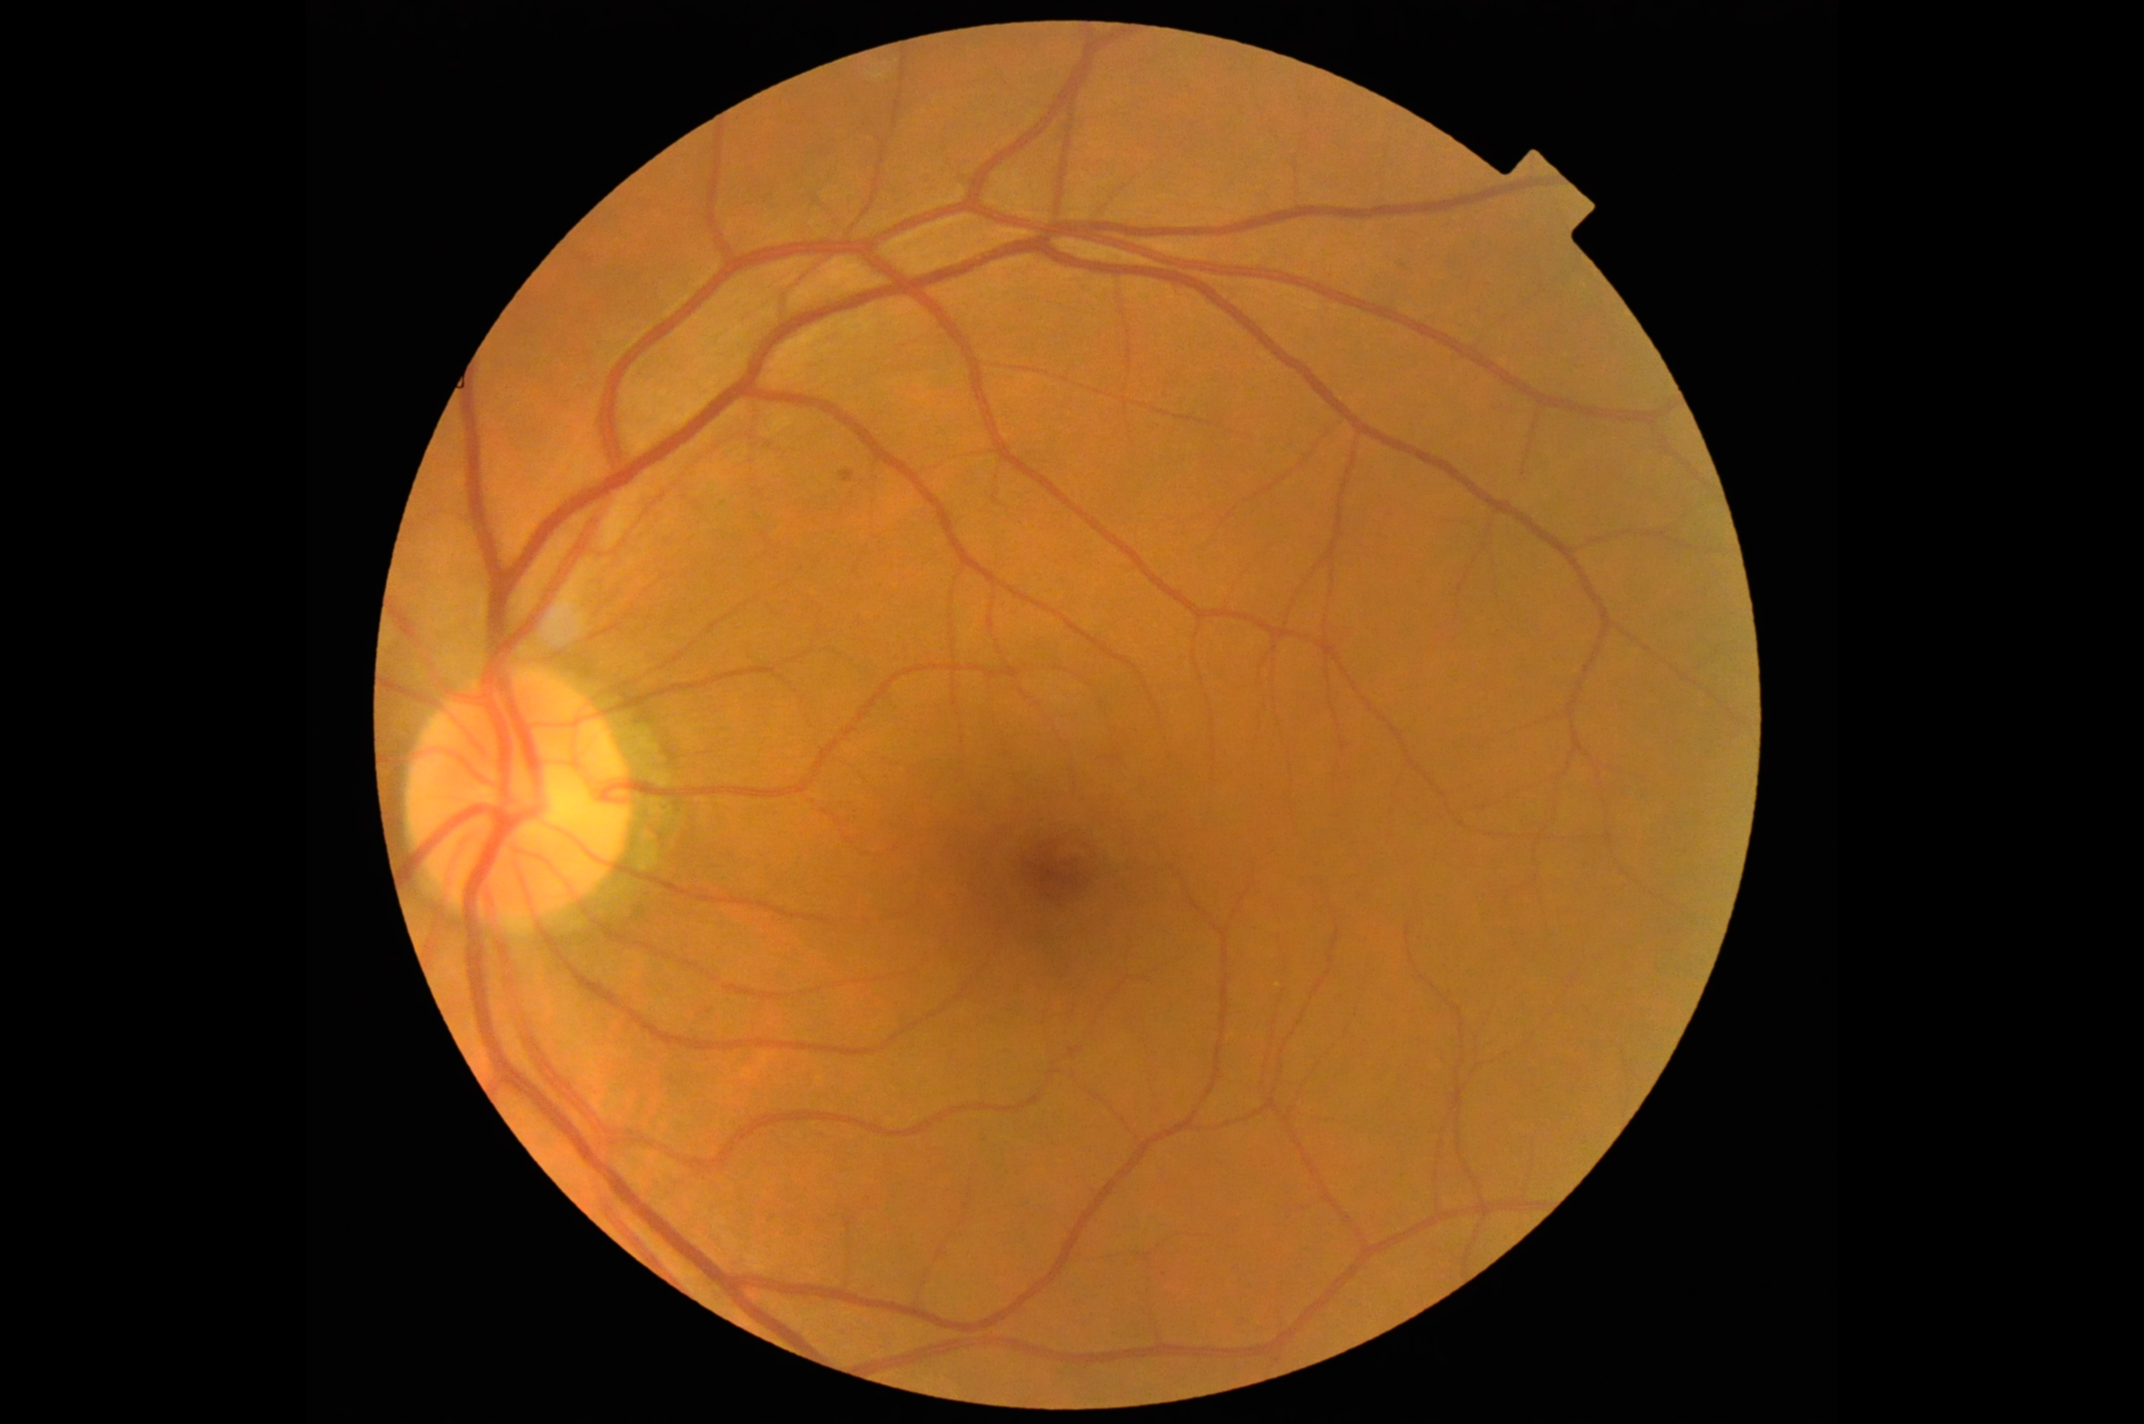

(1424, 2144, 3)

In [7]:
img = load_img(training_data['path'][15])
imgarr = img_to_array(img)
x=tf.keras.layers.Resizing(200, 200)
x=x(imgarr)
y=array_to_img(x)
imgarrz = img_to_array(y)
display(img)
imgarr.shape

In [8]:
train_images=[]
train_labels=[]
valid_images=[]
valid_labels=[]
test_images=[]
test_labels=[]

for row in range(0,len(training_data)):
#for row in range(0,100):
    imgl = load_img(training_data['path'][row])
    ires = tf.keras.layers.Resizing(200, 200)
    imgarr = img_to_array(imgl)
    img = ires(imgarr)
    train_images.append(img)
    label = training_data['Disease_Risk'][row]
    train_labels.append(label)

for row in range(0,len(validation_data)):
#for row in range(0,100):
    imgl = load_img(validation_data['path'][row])
    ires = tf.keras.layers.Resizing(200, 200)
    imgarr = img_to_array(imgl)
    img = ires(imgarr)
    valid_images.append(img)
    label = validation_data['Disease_Risk'][row]
    valid_labels.append(label)

for row in range(0,len(testing_data)):
#for row in range(0,100):
    imgl = load_img(testing_data['path'][row])
    ires = tf.keras.layers.Resizing(200, 200)
    imgarr = img_to_array(imgl)
    img = ires(imgarr)
    test_images.append(img)
    label = testing_data['Disease_Risk'][row]
    test_labels.append(label)

In [9]:
np.random.seed(1)
normal=[]
diseased=[]
index=0
for x in train_labels:
    if x==0:
        normal.append(index)
    else:
        diseased.append(index)
    index+=1
   
subset = diseased + normal
np.random.shuffle(subset)

subset=np.array(subset)
train_images=np.array(train_images)
train_labels=np.array(train_labels)

train_images = train_images[subset, :, :]
train_labels = train_labels[subset]

In [10]:
img_rows, img_cols = 200, 200

if K.image_data_format() == 'channels_first':
    shape_ord = (3, img_rows, img_cols)
else:
    shape_ord = (img_rows, img_cols, 3)

valid_images=np.array(valid_images)
test_images=np.array(test_images)
valid_labels=np.array(valid_labels)
test_labels=np.array(test_labels)

train_images = train_images.reshape((train_images.shape[0],) + shape_ord)
valid_images = valid_images.reshape((valid_images.shape[0],) + shape_ord)
test_images = test_images.reshape((test_images.shape[0],) + shape_ord)

train_images /= 255
valid_images /= 255
test_images /= 255

#train_labels = (train_labels == 1).astype('float32').reshape((-1,1))
#valid_labels = (valid_labels == 1).astype('float32').reshape((-1,1))
#test_labels = (test_labels == 1).astype('float32').reshape((-1,1))

#nb_classes = 2
#train_labels = np_utils.to_categorical(train_labels, nb_classes)
#valid_labels = np_utils.to_categorical(valid_labels, nb_classes)
#test_labels = np_utils.to_categorical(test_labels, nb_classes)

In [31]:
class retinal_model:
    def build_model(self, model_number, nb_epoch, batch_size, nb_filters, nb_pool, nb_conv, act1, act2, act3, optimizer):

        model = Sequential()
        
        model.add(Conv2D(filters=nb_filters, kernel_size=(nb_conv, nb_conv), activation=act1, 
                         padding='valid', input_shape=shape_ord))
        model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation=act2))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation=act2))
        model.add(Dropout(0.5))
        model.add(Dense(1, activation=act3))

        model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

        hist = model.fit(train_images, train_labels, batch_size=batch_size, 
                  epochs=nb_epoch,verbose=1,
                  validation_data=(valid_images, valid_labels))
        
        model.summary()

        plt.figure()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.plot(hist.history['loss'])
        print(hist.history.keys())
        plt.plot(hist.history['val_loss'])
        plt.legend(['Training', 'Validation'])

        plt.figure()
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.plot(hist.history['accuracy'])
        plt.plot(hist.history['val_accuracy'])
        plt.legend(['Training', 'Validation'], loc='lower right')
        
        name = "my_model_"+str(model_number)+'.h5'
        model.save(name)
        
        return name
    
    def model_testing(model):
        
        score, accuracy = model.evaluate(test_images, test_labels, verbose=1)
        print('Score: ',score)
        print('Accuracy: ',accuracy)

Epoch 1/10
30/30 [==============================] - 14s 470ms/step - loss: 0.5851 - accuracy: 0.7307 - val_loss: 0.5003 - val_accuracy: 0.7906
Epoch 2/10
30/30 [==============================] - 14s 458ms/step - loss: 0.5374 - accuracy: 0.7599 - val_loss: 0.5073 - val_accuracy: 0.7906
Epoch 3/10
30/30 [==============================] - 14s 459ms/step - loss: 0.5321 - accuracy: 0.7750 - val_loss: 0.4954 - val_accuracy: 0.7906
Epoch 4/10
30/30 [==============================] - 14s 459ms/step - loss: 0.5176 - accuracy: 0.7828 - val_loss: 0.5035 - val_accuracy: 0.7906
Epoch 5/10
30/30 [==============================] - 14s 459ms/step - loss: 0.5075 - accuracy: 0.7854 - val_loss: 0.4872 - val_accuracy: 0.7906
Epoch 6/10
30/30 [==============================] - 14s 462ms/step - loss: 0.5180 - accuracy: 0.7839 - val_loss: 0.4808 - val_accuracy: 0.7906
Epoch 7/10
30/30 [==============================] - 14s 460ms/step - loss: 0.4956 - accuracy: 0.7896 - val_loss: 0.5009 - val_accuracy: 0.7906

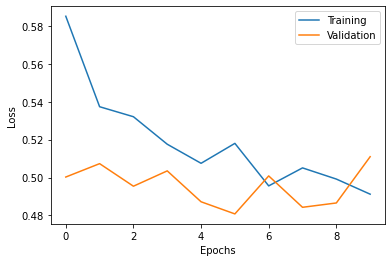

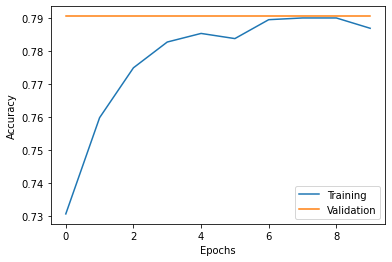

In [32]:
model1=retinal_model()
m1 = model1.build_model(1, 10, 64, 32, 2, 3, "relu", "relu", "sigmoid", "sgd")

In [33]:
model_1=tf.keras.models.load_model(m1)

Epoch 1/10
30/30 [==============================] - 14s 470ms/step - loss: 0.5436 - accuracy: 0.7911 - val_loss: 0.5154 - val_accuracy: 0.7906
Epoch 2/10
30/30 [==============================] - 14s 461ms/step - loss: 0.5193 - accuracy: 0.7911 - val_loss: 0.5117 - val_accuracy: 0.7906
Epoch 3/10
30/30 [==============================] - 14s 465ms/step - loss: 0.5097 - accuracy: 0.7911 - val_loss: 0.4886 - val_accuracy: 0.7906
Epoch 4/10
30/30 [==============================] - 14s 460ms/step - loss: 0.5130 - accuracy: 0.7911 - val_loss: 0.5263 - val_accuracy: 0.7906
Epoch 5/10
30/30 [==============================] - 14s 467ms/step - loss: 0.4907 - accuracy: 0.7911 - val_loss: 0.4717 - val_accuracy: 0.7906
Epoch 6/10
30/30 [==============================] - 14s 465ms/step - loss: 0.4976 - accuracy: 0.7911 - val_loss: 0.4745 - val_accuracy: 0.7906
Epoch 7/10
30/30 [==============================] - 14s 464ms/step - loss: 0.4866 - accuracy: 0.7911 - val_loss: 0.4793 - val_accuracy: 0.7906

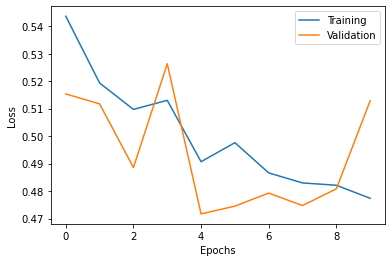

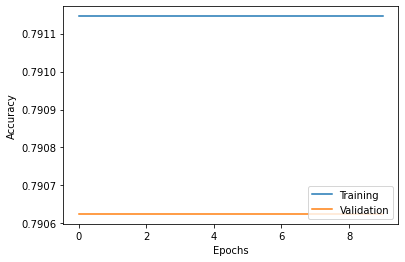

In [34]:
model2=retinal_model()
m2 = model2.build_model(2, 10, 64, 32, 2, 3, "relu", "relu", "softmax", "sgd")

In [35]:
model_2=tf.keras.models.load_model(m2)

Epoch 1/10
30/30 [==============================] - 16s 512ms/step - loss: 1.4584 - accuracy: 0.7104 - val_loss: 0.5171 - val_accuracy: 0.7906
Epoch 2/10
30/30 [==============================] - 15s 504ms/step - loss: 0.5209 - accuracy: 0.7781 - val_loss: 0.4950 - val_accuracy: 0.7906
Epoch 3/10
30/30 [==============================] - 15s 498ms/step - loss: 0.5020 - accuracy: 0.7854 - val_loss: 0.5015 - val_accuracy: 0.7906
Epoch 4/10
30/30 [==============================] - 15s 492ms/step - loss: 0.4905 - accuracy: 0.7885 - val_loss: 0.4815 - val_accuracy: 0.7906
Epoch 5/10
30/30 [==============================] - 15s 501ms/step - loss: 0.4690 - accuracy: 0.7911 - val_loss: 0.4827 - val_accuracy: 0.7906
Epoch 6/10
30/30 [==============================] - 15s 499ms/step - loss: 0.4600 - accuracy: 0.7901 - val_loss: 0.4386 - val_accuracy: 0.7906
Epoch 7/10
30/30 [==============================] - 15s 498ms/step - loss: 0.4508 - accuracy: 0.7911 - val_loss: 0.4463 - val_accuracy: 0.7906

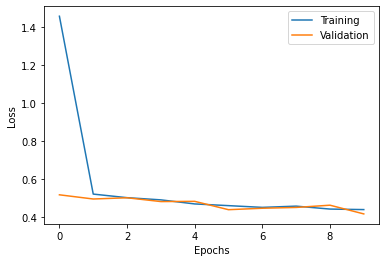

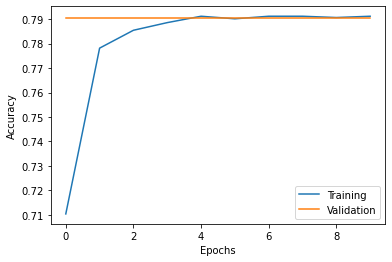

In [36]:
model3=retinal_model()
m3 = model3.build_model(3, 10, 64, 32, 2, 3, "relu", "relu", "sigmoid", "adam")

In [37]:
model_3=tf.keras.models.load_model(m3)

Epoch 1/25
30/30 [==============================] - 16s 515ms/step - loss: 1.4802 - accuracy: 0.7109 - val_loss: 0.5881 - val_accuracy: 0.7906
Epoch 2/25
30/30 [==============================] - 15s 513ms/step - loss: 0.5104 - accuracy: 0.7833 - val_loss: 0.4759 - val_accuracy: 0.8031
Epoch 3/25
30/30 [==============================] - 15s 512ms/step - loss: 0.4892 - accuracy: 0.7969 - val_loss: 0.4785 - val_accuracy: 0.8156
Epoch 4/25
30/30 [==============================] - 15s 509ms/step - loss: 0.4707 - accuracy: 0.8146 - val_loss: 0.5005 - val_accuracy: 0.8141
Epoch 5/25
30/30 [==============================] - 15s 503ms/step - loss: 0.4711 - accuracy: 0.8125 - val_loss: 0.4847 - val_accuracy: 0.8172
Epoch 6/25
30/30 [==============================] - 15s 501ms/step - loss: 0.4578 - accuracy: 0.8135 - val_loss: 0.4902 - val_accuracy: 0.8156
Epoch 7/25
30/30 [==============================] - 15s 506ms/step - loss: 0.4492 - accuracy: 0.8219 - val_loss: 0.4573 - val_accuracy: 0.8172

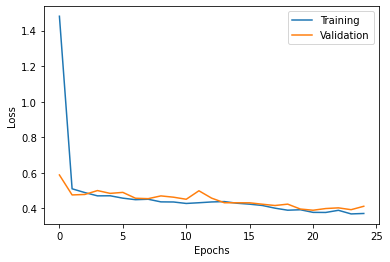

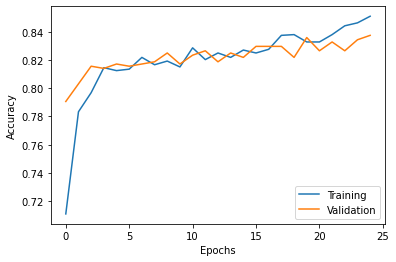

In [38]:
model4=retinal_model()
m4 = model4.build_model(4, 25, 64, 32, 2, 3, "relu", "relu", "sigmoid", "adam")

In [39]:
model_4=tf.keras.models.load_model(m4)

Epoch 1/25
30/30 [==============================] - 20s 636ms/step - loss: 2.5052 - accuracy: 0.7068 - val_loss: 0.6187 - val_accuracy: 0.8141
Epoch 2/25
30/30 [==============================] - 18s 606ms/step - loss: 0.5813 - accuracy: 0.7698 - val_loss: 0.4864 - val_accuracy: 0.8172
Epoch 3/25
30/30 [==============================] - 18s 605ms/step - loss: 0.5195 - accuracy: 0.7927 - val_loss: 0.4437 - val_accuracy: 0.8219
Epoch 4/25
30/30 [==============================] - 18s 590ms/step - loss: 0.4681 - accuracy: 0.7943 - val_loss: 0.4397 - val_accuracy: 0.8156
Epoch 5/25
30/30 [==============================] - 18s 588ms/step - loss: 0.4584 - accuracy: 0.8115 - val_loss: 0.4821 - val_accuracy: 0.8141
Epoch 6/25
30/30 [==============================] - 18s 587ms/step - loss: 0.4595 - accuracy: 0.8146 - val_loss: 0.4128 - val_accuracy: 0.8156
Epoch 7/25
30/30 [==============================] - 18s 587ms/step - loss: 0.4369 - accuracy: 0.8177 - val_loss: 0.4029 - val_accuracy: 0.8188

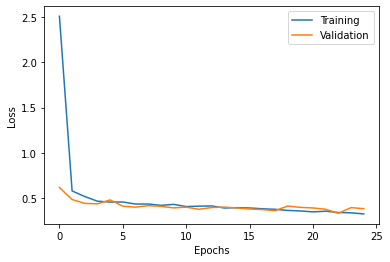

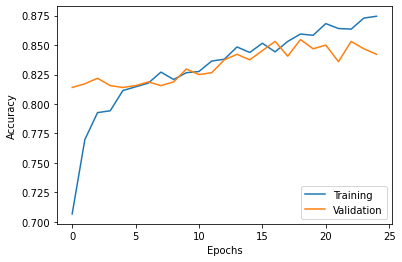

In [40]:
model5=retinal_model()
m5 = model5.build_model(5, 25, 64, 32, 2, 3, "relu", "relu", "sigmoid", "RMSprop")

In [41]:
model_5=tf.keras.models.load_model(m5)

Epoch 1/25
15/15 [==============================] - 16s 1s/step - loss: 3.4239 - accuracy: 0.6724 - val_loss: 0.4705 - val_accuracy: 0.7906
Epoch 2/25
15/15 [==============================] - 15s 997ms/step - loss: 0.5768 - accuracy: 0.7516 - val_loss: 0.4754 - val_accuracy: 0.8203
Epoch 3/25
15/15 [==============================] - 15s 992ms/step - loss: 0.5301 - accuracy: 0.7578 - val_loss: 0.4631 - val_accuracy: 0.8188
Epoch 4/25
15/15 [==============================] - 15s 1s/step - loss: 0.5075 - accuracy: 0.7651 - val_loss: 0.4456 - val_accuracy: 0.7906
Epoch 5/25
15/15 [==============================] - 15s 1s/step - loss: 0.4838 - accuracy: 0.7880 - val_loss: 0.4315 - val_accuracy: 0.7906
Epoch 6/25
15/15 [==============================] - 15s 993ms/step - loss: 0.4763 - accuracy: 0.7812 - val_loss: 0.4250 - val_accuracy: 0.7906
Epoch 7/25
15/15 [==============================] - 15s 1s/step - loss: 0.4760 - accuracy: 0.7911 - val_loss: 0.4408 - val_accuracy: 0.8141
Epoch 8/25


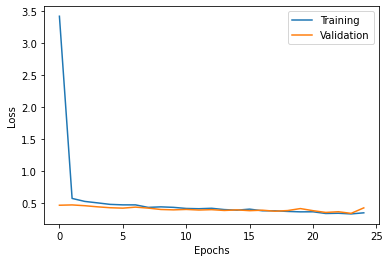

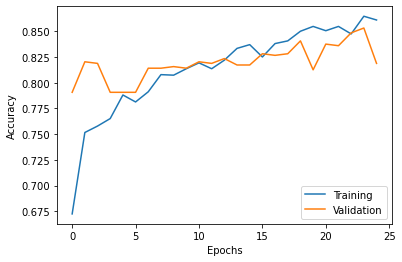

In [43]:
model6=retinal_model()
m6 = model6.build_model(6, 25, 128, 32, 2, 3, "relu", "relu", "sigmoid", "RMSprop")

In [44]:
model_6=tf.keras.models.load_model(m6)

Epoch 1/25
60/60 [==============================] - 25s 404ms/step - loss: 1.2375 - accuracy: 0.7417 - val_loss: 0.4497 - val_accuracy: 0.8203
Epoch 2/25
60/60 [==============================] - 24s 397ms/step - loss: 0.4780 - accuracy: 0.8104 - val_loss: 0.4398 - val_accuracy: 0.8156
Epoch 3/25
60/60 [==============================] - 24s 399ms/step - loss: 0.4547 - accuracy: 0.8156 - val_loss: 0.4538 - val_accuracy: 0.8141
Epoch 4/25
60/60 [==============================] - 24s 398ms/step - loss: 0.4381 - accuracy: 0.8214 - val_loss: 0.4981 - val_accuracy: 0.8203
Epoch 5/25
60/60 [==============================] - 24s 397ms/step - loss: 0.4347 - accuracy: 0.8229 - val_loss: 0.4383 - val_accuracy: 0.8156
Epoch 6/25
60/60 [==============================] - 24s 397ms/step - loss: 0.4338 - accuracy: 0.8271 - val_loss: 0.4365 - val_accuracy: 0.8156
Epoch 7/25
60/60 [==============================] - 24s 398ms/step - loss: 0.4395 - accuracy: 0.8292 - val_loss: 0.4231 - val_accuracy: 0.8234

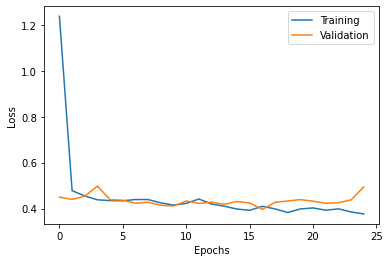

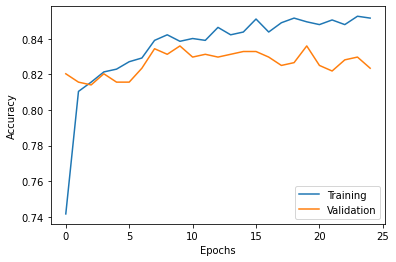

In [45]:
model7=retinal_model()
m7 = model7.build_model(7, 25, 32, 32, 2, 3, "relu", "relu", "sigmoid", "RMSprop")

In [46]:
model_7=tf.keras.models.load_model(m7)

Epoch 1/25
30/30 [==============================] - 19s 620ms/step - loss: 0.6614 - accuracy: 0.7469 - val_loss: 0.5152 - val_accuracy: 0.7906
Epoch 2/25
30/30 [==============================] - 18s 615ms/step - loss: 0.5996 - accuracy: 0.7469 - val_loss: 0.5708 - val_accuracy: 0.7906
Epoch 3/25
30/30 [==============================] - 18s 617ms/step - loss: 0.5940 - accuracy: 0.7630 - val_loss: 0.5212 - val_accuracy: 0.7906
Epoch 4/25
30/30 [==============================] - 18s 618ms/step - loss: 0.5974 - accuracy: 0.7542 - val_loss: 0.5610 - val_accuracy: 0.7906
Epoch 5/25
30/30 [==============================] - 19s 620ms/step - loss: 0.5701 - accuracy: 0.7620 - val_loss: 0.5774 - val_accuracy: 0.7906
Epoch 6/25
30/30 [==============================] - 18s 616ms/step - loss: 0.5903 - accuracy: 0.7641 - val_loss: 0.5218 - val_accuracy: 0.7906
Epoch 7/25
30/30 [==============================] - 18s 615ms/step - loss: 0.5884 - accuracy: 0.7583 - val_loss: 0.5848 - val_accuracy: 0.7906

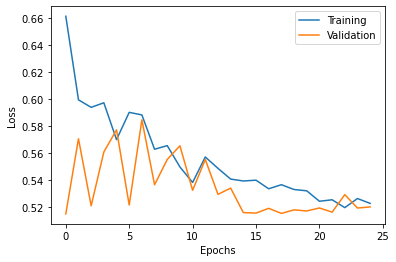

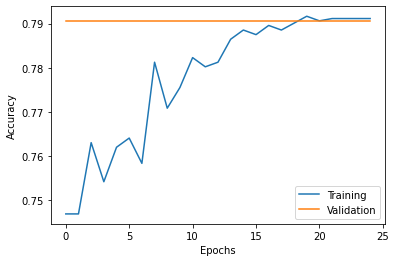

In [47]:
model8=retinal_model()
m8 = model8.build_model(8, 25, 64, 32, 2, 3, "tanh", "tanh", "sigmoid", "RMSprop")

In [48]:
model_8=tf.keras.models.load_model(m8)

Epoch 1/25
30/30 [==============================] - 19s 619ms/step - loss: 7.3248 - accuracy: 0.6766 - val_loss: 0.5538 - val_accuracy: 0.7766
Epoch 2/25
30/30 [==============================] - 18s 615ms/step - loss: 0.6807 - accuracy: 0.7396 - val_loss: 0.5405 - val_accuracy: 0.7906
Epoch 3/25
30/30 [==============================] - 18s 617ms/step - loss: 0.6883 - accuracy: 0.7484 - val_loss: 0.5137 - val_accuracy: 0.7891
Epoch 4/25
30/30 [==============================] - 19s 621ms/step - loss: 0.6904 - accuracy: 0.7620 - val_loss: 0.5915 - val_accuracy: 0.7906
Epoch 5/25
30/30 [==============================] - 19s 624ms/step - loss: 0.5820 - accuracy: 0.7839 - val_loss: 0.5469 - val_accuracy: 0.7906
Epoch 6/25
30/30 [==============================] - 19s 622ms/step - loss: 0.6183 - accuracy: 0.7677 - val_loss: 0.5347 - val_accuracy: 0.7906
Epoch 7/25
30/30 [==============================] - 19s 620ms/step - loss: 0.5627 - accuracy: 0.7766 - val_loss: 0.5301 - val_accuracy: 0.7906

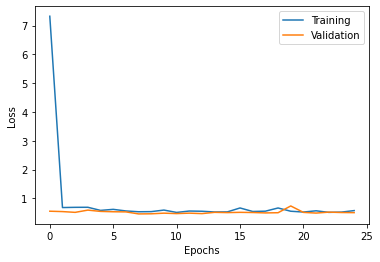

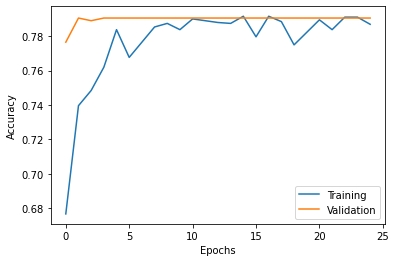

In [49]:
model9=retinal_model()
m9 = model9.build_model(9, 25, 64, 32, 2, 3, "tanh", "relu", "sigmoid", "RMSprop")

In [50]:
model_9=tf.keras.models.load_model(m9)

Epoch 1/25
30/30 [==============================] - 19s 610ms/step - loss: 0.6348 - accuracy: 0.7490 - val_loss: 0.5668 - val_accuracy: 0.7906
Epoch 2/25
30/30 [==============================] - 18s 603ms/step - loss: 0.6026 - accuracy: 0.7510 - val_loss: 0.5800 - val_accuracy: 0.7906
Epoch 3/25
30/30 [==============================] - 18s 604ms/step - loss: 0.6151 - accuracy: 0.7552 - val_loss: 0.5880 - val_accuracy: 0.7906
Epoch 4/25
30/30 [==============================] - 18s 604ms/step - loss: 0.5882 - accuracy: 0.7516 - val_loss: 0.5650 - val_accuracy: 0.7906
Epoch 5/25
30/30 [==============================] - 18s 603ms/step - loss: 0.5743 - accuracy: 0.7682 - val_loss: 0.5142 - val_accuracy: 0.7906
Epoch 6/25
30/30 [==============================] - 18s 607ms/step - loss: 0.5724 - accuracy: 0.7755 - val_loss: 0.5219 - val_accuracy: 0.7906
Epoch 7/25
30/30 [==============================] - 18s 604ms/step - loss: 0.5739 - accuracy: 0.7688 - val_loss: 0.5242 - val_accuracy: 0.7906

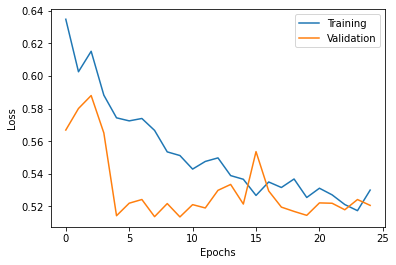

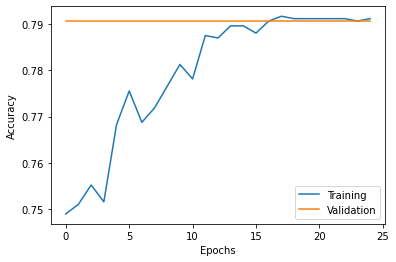

In [51]:
model10=retinal_model()
m10 = model10.build_model(10, 25, 64, 32, 2, 3, "relu", "tanh", "sigmoid", "RMSprop")

In [52]:
model_10=tf.keras.models.load_model(m10)

Epoch 1/50
30/30 [==============================] - 19s 619ms/step - loss: 3.2851 - accuracy: 0.7099 - val_loss: 0.5024 - val_accuracy: 0.7906
Epoch 2/50
30/30 [==============================] - 18s 602ms/step - loss: 0.5802 - accuracy: 0.7620 - val_loss: 0.5294 - val_accuracy: 0.7906
Epoch 3/50
30/30 [==============================] - 18s 599ms/step - loss: 0.5595 - accuracy: 0.7786 - val_loss: 0.4904 - val_accuracy: 0.7906
Epoch 4/50
30/30 [==============================] - 18s 593ms/step - loss: 0.4919 - accuracy: 0.7922 - val_loss: 0.4487 - val_accuracy: 0.7984
Epoch 5/50
30/30 [==============================] - 18s 590ms/step - loss: 0.4755 - accuracy: 0.8094 - val_loss: 0.4790 - val_accuracy: 0.8141
Epoch 6/50
30/30 [==============================] - 18s 592ms/step - loss: 0.4585 - accuracy: 0.8151 - val_loss: 0.4318 - val_accuracy: 0.8141
Epoch 7/50
30/30 [==============================] - 18s 589ms/step - loss: 0.4627 - accuracy: 0.8141 - val_loss: 0.4311 - val_accuracy: 0.8156

                                                                 
 dense_64 (Dense)            (None, 64)                8256      
                                                                 
 dropout_83 (Dropout)        (None, 64)                0         
                                                                 
 dense_65 (Dense)            (None, 1)                 65        
                                                                 
Total params: 40,154,241
Trainable params: 40,154,241
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


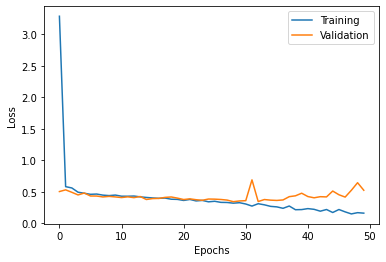

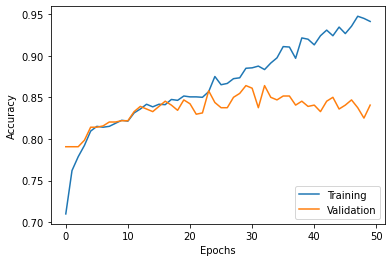

In [53]:
model11=retinal_model()
m11 = model11.build_model(11, 50, 64, 32, 2, 3, "relu", "relu", "sigmoid", "RMSprop")

In [54]:
model_11=tf.keras.models.load_model(m11)

Epoch 1/25
30/30 [==============================] - 10s 311ms/step - loss: 0.7797 - accuracy: 0.7365 - val_loss: 0.4629 - val_accuracy: 0.8141
Epoch 2/25
30/30 [==============================] - 9s 303ms/step - loss: 0.4852 - accuracy: 0.8021 - val_loss: 0.4462 - val_accuracy: 0.8156
Epoch 3/25
30/30 [==============================] - 9s 299ms/step - loss: 0.4631 - accuracy: 0.8047 - val_loss: 0.4663 - val_accuracy: 0.8141
Epoch 4/25
30/30 [==============================] - 9s 300ms/step - loss: 0.4544 - accuracy: 0.8120 - val_loss: 0.4153 - val_accuracy: 0.8141
Epoch 5/25
30/30 [==============================] - 9s 299ms/step - loss: 0.4572 - accuracy: 0.8172 - val_loss: 0.4722 - val_accuracy: 0.8188
Epoch 6/25
30/30 [==============================] - 9s 297ms/step - loss: 0.4345 - accuracy: 0.8182 - val_loss: 0.4328 - val_accuracy: 0.8188
Epoch 7/25
30/30 [==============================] - 9s 297ms/step - loss: 0.4263 - accuracy: 0.8182 - val_loss: 0.3897 - val_accuracy: 0.8219
Epoch

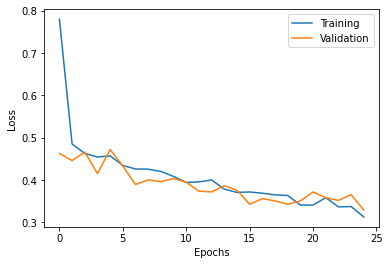

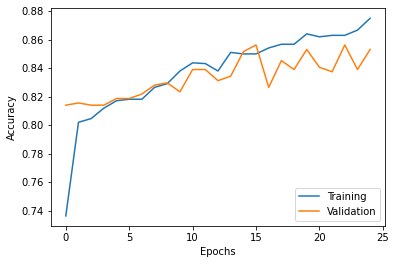

In [56]:
model12=retinal_model()
m12 = model12.build_model(11, 25, 64, 32, 4, 3, "relu", "relu", "sigmoid", "RMSprop")

In [58]:
model_12=tf.keras.models.load_model(m12)

Epoch 1/25
30/30 [==============================] - 55s 2s/step - loss: 7.9726 - accuracy: 0.6703 - val_loss: 0.5688 - val_accuracy: 0.7906
Epoch 2/25
30/30 [==============================] - 52s 2s/step - loss: 0.6974 - accuracy: 0.7568 - val_loss: 0.5022 - val_accuracy: 0.7922
Epoch 3/25
30/30 [==============================] - 53s 2s/step - loss: 0.5336 - accuracy: 0.7812 - val_loss: 0.4316 - val_accuracy: 0.8156
Epoch 4/25
30/30 [==============================] - 52s 2s/step - loss: 0.4631 - accuracy: 0.8052 - val_loss: 0.4339 - val_accuracy: 0.8172
Epoch 5/25
30/30 [==============================] - 52s 2s/step - loss: 0.4468 - accuracy: 0.8188 - val_loss: 0.4553 - val_accuracy: 0.8219
Epoch 6/25
30/30 [==============================] - 52s 2s/step - loss: 0.4390 - accuracy: 0.8151 - val_loss: 0.4016 - val_accuracy: 0.8188
Epoch 7/25
30/30 [==============================] - 52s 2s/step - loss: 0.4370 - accuracy: 0.8250 - val_loss: 0.4065 - val_accuracy: 0.8203
Epoch 8/25
30/30 [==

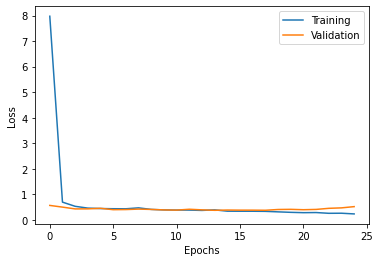

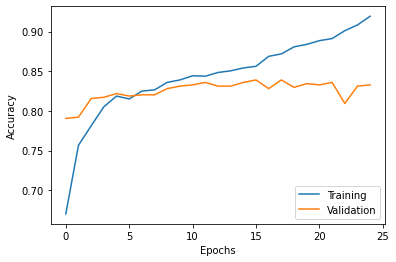

In [59]:
model13=retinal_model()
m13 = model13.build_model(13, 25, 64, 32, 1, 3, "relu", "relu", "sigmoid", "RMSprop")

In [60]:
model_13=tf.keras.models.load_model(m13)

Epoch 1/25
30/30 [==============================] - 9s 269ms/step - loss: 0.5533 - accuracy: 0.7719 - val_loss: 0.4846 - val_accuracy: 0.7906
Epoch 2/25
30/30 [==============================] - 8s 255ms/step - loss: 0.4791 - accuracy: 0.8010 - val_loss: 0.4345 - val_accuracy: 0.7984
Epoch 3/25
30/30 [==============================] - 8s 250ms/step - loss: 0.4545 - accuracy: 0.8057 - val_loss: 0.4554 - val_accuracy: 0.8156
Epoch 4/25
30/30 [==============================] - 8s 251ms/step - loss: 0.4448 - accuracy: 0.8151 - val_loss: 0.4158 - val_accuracy: 0.8156
Epoch 5/25
30/30 [==============================] - 7s 248ms/step - loss: 0.4369 - accuracy: 0.8193 - val_loss: 0.4072 - val_accuracy: 0.8203
Epoch 6/25
30/30 [==============================] - 7s 250ms/step - loss: 0.4228 - accuracy: 0.8193 - val_loss: 0.3925 - val_accuracy: 0.8203
Epoch 7/25
30/30 [==============================] - 8s 256ms/step - loss: 0.4239 - accuracy: 0.8307 - val_loss: 0.4354 - val_accuracy: 0.8328
Epoch 

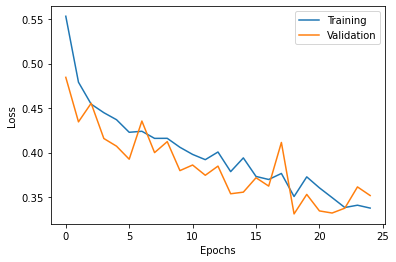

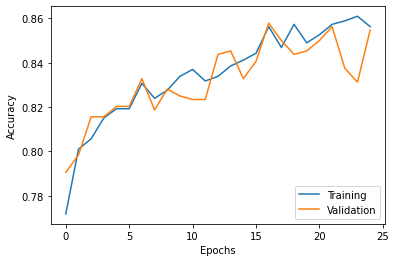

In [62]:
model14=retinal_model()
m14 = model14.build_model(14, 25, 64, 32, 8, 3, "relu", "relu", "sigmoid", "RMSprop")

In [63]:
model_14=tf.keras.models.load_model(m14)

Epoch 1/25
30/30 [==============================] - 8s 243ms/step - loss: 0.5363 - accuracy: 0.7880 - val_loss: 0.4979 - val_accuracy: 0.7906
Epoch 2/25
30/30 [==============================] - 7s 237ms/step - loss: 0.4906 - accuracy: 0.7922 - val_loss: 0.4656 - val_accuracy: 0.7906
Epoch 3/25
30/30 [==============================] - 7s 231ms/step - loss: 0.4635 - accuracy: 0.7932 - val_loss: 0.4415 - val_accuracy: 0.8172
Epoch 4/25
30/30 [==============================] - 7s 226ms/step - loss: 0.4541 - accuracy: 0.8047 - val_loss: 0.4382 - val_accuracy: 0.8203
Epoch 5/25
30/30 [==============================] - 7s 222ms/step - loss: 0.4403 - accuracy: 0.8193 - val_loss: 0.4233 - val_accuracy: 0.8203
Epoch 6/25
30/30 [==============================] - 7s 221ms/step - loss: 0.4370 - accuracy: 0.8188 - val_loss: 0.4150 - val_accuracy: 0.8188
Epoch 7/25
30/30 [==============================] - 7s 225ms/step - loss: 0.4287 - accuracy: 0.8224 - val_loss: 0.4154 - val_accuracy: 0.8234
Epoch 

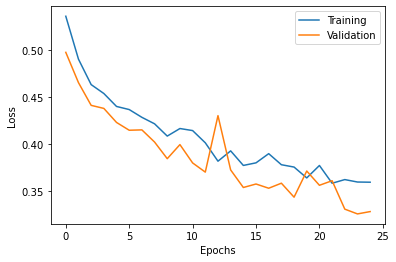

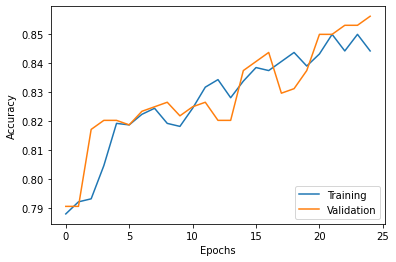

In [64]:
model15=retinal_model()
m15 = model15.build_model(15, 25, 64, 32, 16, 3, "relu", "relu", "sigmoid", "RMSprop")

In [65]:
model_15=tf.keras.models.load_model(m15)

Epoch 1/25
30/30 [==============================] - 10s 310ms/step - loss: 0.5276 - accuracy: 0.7729 - val_loss: 0.4704 - val_accuracy: 0.7906
Epoch 2/25
30/30 [==============================] - 9s 312ms/step - loss: 0.4783 - accuracy: 0.7943 - val_loss: 0.4650 - val_accuracy: 0.8172
Epoch 3/25
30/30 [==============================] - 9s 308ms/step - loss: 0.4705 - accuracy: 0.8156 - val_loss: 0.4473 - val_accuracy: 0.8203
Epoch 4/25
30/30 [==============================] - 9s 308ms/step - loss: 0.4673 - accuracy: 0.8099 - val_loss: 0.4435 - val_accuracy: 0.8172
Epoch 5/25
30/30 [==============================] - 9s 305ms/step - loss: 0.4476 - accuracy: 0.8151 - val_loss: 0.4234 - val_accuracy: 0.8203
Epoch 6/25
30/30 [==============================] - 9s 309ms/step - loss: 0.4478 - accuracy: 0.8203 - val_loss: 0.4524 - val_accuracy: 0.8188
Epoch 7/25
30/30 [==============================] - 9s 309ms/step - loss: 0.4471 - accuracy: 0.8135 - val_loss: 0.5343 - val_accuracy: 0.8266
Epoch

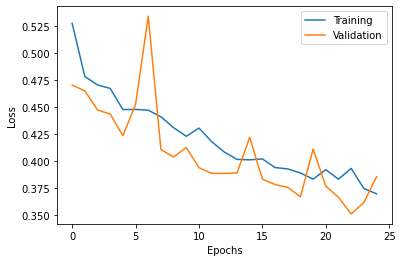

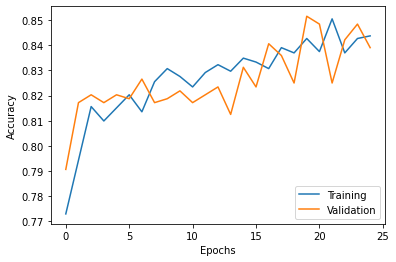

In [66]:
model16=retinal_model()
m16 = model16.build_model(16, 25, 64, 32, 16, 5, "relu", "relu", "sigmoid", "RMSprop")

In [67]:
model_16=tf.keras.models.load_model(m16)

Epoch 1/25
30/30 [==============================] - 7s 226ms/step - loss: 0.5163 - accuracy: 0.7849 - val_loss: 0.5030 - val_accuracy: 0.7906
Epoch 2/25
30/30 [==============================] - 7s 218ms/step - loss: 0.5053 - accuracy: 0.7906 - val_loss: 0.4777 - val_accuracy: 0.7906
Epoch 3/25
30/30 [==============================] - 7s 222ms/step - loss: 0.4783 - accuracy: 0.7917 - val_loss: 0.4595 - val_accuracy: 0.7906
Epoch 4/25
30/30 [==============================] - 7s 224ms/step - loss: 0.4702 - accuracy: 0.7906 - val_loss: 0.4835 - val_accuracy: 0.7953
Epoch 5/25
30/30 [==============================] - 7s 222ms/step - loss: 0.4556 - accuracy: 0.7906 - val_loss: 0.4454 - val_accuracy: 0.7906
Epoch 6/25
30/30 [==============================] - 7s 222ms/step - loss: 0.4566 - accuracy: 0.7964 - val_loss: 0.4500 - val_accuracy: 0.8094
Epoch 7/25
30/30 [==============================] - 7s 221ms/step - loss: 0.4501 - accuracy: 0.8031 - val_loss: 0.4272 - val_accuracy: 0.8156
Epoch 

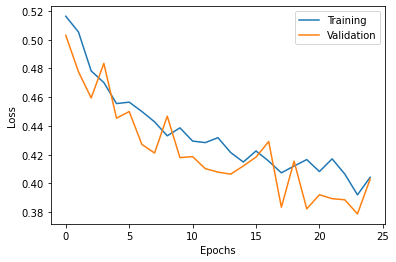

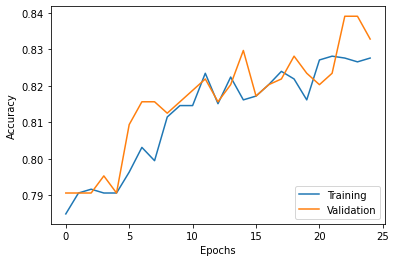

In [68]:
model17=retinal_model()
m17 = model17.build_model(17, 25, 64, 32, 16, 1, "relu", "relu", "sigmoid", "RMSprop")

In [69]:
model_17=tf.keras.models.load_model(m17)

Epoch 1/50
30/30 [==============================] - 7s 218ms/step - loss: 0.5572 - accuracy: 0.7667 - val_loss: 0.4871 - val_accuracy: 0.7906
Epoch 2/50
30/30 [==============================] - 6s 208ms/step - loss: 0.4979 - accuracy: 0.7911 - val_loss: 0.4696 - val_accuracy: 0.7906
Epoch 3/50
30/30 [==============================] - 6s 210ms/step - loss: 0.4818 - accuracy: 0.7937 - val_loss: 0.4514 - val_accuracy: 0.8188
Epoch 4/50
30/30 [==============================] - 6s 208ms/step - loss: 0.4596 - accuracy: 0.8078 - val_loss: 0.4512 - val_accuracy: 0.8172
Epoch 5/50
30/30 [==============================] - 6s 211ms/step - loss: 0.4583 - accuracy: 0.8089 - val_loss: 0.4340 - val_accuracy: 0.8172
Epoch 6/50
30/30 [==============================] - 6s 209ms/step - loss: 0.4427 - accuracy: 0.8156 - val_loss: 0.4182 - val_accuracy: 0.8234
Epoch 7/50
30/30 [==============================] - 6s 210ms/step - loss: 0.4295 - accuracy: 0.8156 - val_loss: 0.4115 - val_accuracy: 0.8219
Epoch 

 dense_94 (Dense)            (None, 64)                8256      
                                                                 
 dropout_113 (Dropout)       (None, 64)                0         
                                                                 
 dense_95 (Dense)            (None, 1)                 65        
                                                                 
Total params: 598,689
Trainable params: 598,689
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


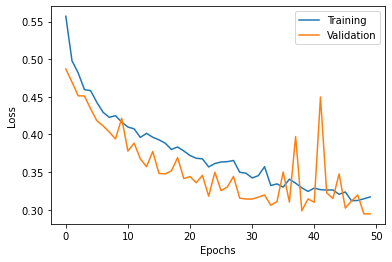

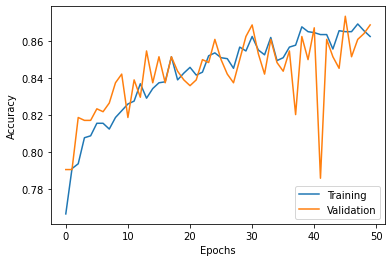

In [76]:
model18=retinal_model()
m18 = model18.build_model(18, 50, 64, 32, 16, 2, "relu", "relu", "sigmoid", "RMSprop")

In [77]:
model_18=tf.keras.models.load_model(m18)

In [ ]:
model18=retinal_model()
m18 = model18.build_model(18, 50, 64, 32, 16, 2, "relu", "relu", "sigmoid", "RMSprop")

Epoch 1/100
30/30 [==============================] - 8s 237ms/step - loss: 0.5530 - accuracy: 0.7667 - val_loss: 0.4938 - val_accuracy: 0.7906
Epoch 2/100
30/30 [==============================] - 6s 213ms/step - loss: 0.4919 - accuracy: 0.7906 - val_loss: 0.4661 - val_accuracy: 0.7906
Epoch 3/100
30/30 [==============================] - 6s 208ms/step - loss: 0.4718 - accuracy: 0.7917 - val_loss: 0.4605 - val_accuracy: 0.8188
Epoch 4/100
30/30 [==============================] - 6s 205ms/step - loss: 0.4621 - accuracy: 0.8005 - val_loss: 0.4339 - val_accuracy: 0.8250
Epoch 5/100
30/30 [==============================] - 6s 203ms/step - loss: 0.4513 - accuracy: 0.8057 - val_loss: 0.4182 - val_accuracy: 0.8234
Epoch 6/100
30/30 [==============================] - 6s 210ms/step - loss: 0.4414 - accuracy: 0.8068 - val_loss: 0.4121 - val_accuracy: 0.8234
Epoch 7/100
30/30 [==============================] - 6s 207ms/step - loss: 0.4279 - accuracy: 0.8135 - val_loss: 0.4347 - val_accuracy: 0.8250

Epoch 58/100
30/30 [==============================] - 6s 210ms/step - loss: 0.2837 - accuracy: 0.8839 - val_loss: 0.4272 - val_accuracy: 0.8234
Epoch 59/100
30/30 [==============================] - 6s 201ms/step - loss: 0.2885 - accuracy: 0.8771 - val_loss: 0.3768 - val_accuracy: 0.8438
Epoch 60/100
30/30 [==============================] - 6s 202ms/step - loss: 0.2938 - accuracy: 0.8823 - val_loss: 0.3632 - val_accuracy: 0.8438
Epoch 61/100
30/30 [==============================] - 6s 208ms/step - loss: 0.2925 - accuracy: 0.8813 - val_loss: 0.3150 - val_accuracy: 0.8500
Epoch 62/100
30/30 [==============================] - 6s 202ms/step - loss: 0.2797 - accuracy: 0.8807 - val_loss: 0.3491 - val_accuracy: 0.8391
Epoch 63/100
30/30 [==============================] - 6s 201ms/step - loss: 0.2783 - accuracy: 0.8823 - val_loss: 0.3699 - val_accuracy: 0.8406
Epoch 64/100
30/30 [==============================] - 6s 201ms/step - loss: 0.2762 - accuracy: 0.8911 - val_loss: 0.3246 - val_accuracy:

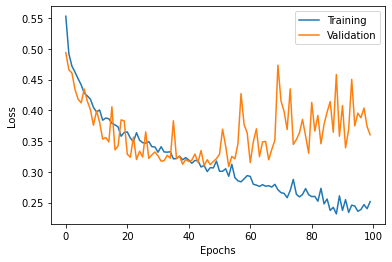

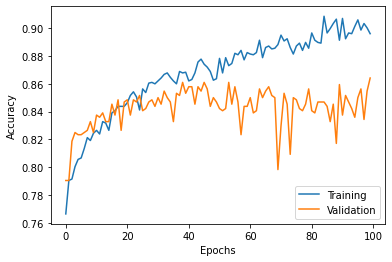

In [85]:
model19=retinal_model()
m19 = model19.build_model(19, 100, 64, 32, 16, 2, "relu", "relu", "sigmoid", "RMSprop")

In [86]:
retinal_model.model_testing(model_18)

20/20 [==============================] - 1s 30ms/step - loss: 0.2551 - accuracy: 0.9016
Score:  0.25508901476860046
Accuracy:  0.901562511920929
